In [47]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [48]:
base_url='https://www.airlinequality.com/airline-reviews/british-airways/'
no_of_pages=30
page_size=100

In [49]:
reviews = []

for i in range(1, no_of_pages+1):
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    review_containers = soup.find_all('article', itemprop="review")
    for review_container in review_containers:
        review = {}
        review['rating'] = review_container.find('span', itemprop='ratingValue').text
        # review['title'] = review_container.find('h2', class_='text_header').text
        review['review'] = review_container.find('div', class_='text_content').text
        reviews.append(review)

In [50]:
reviews_df = pd.DataFrame(reviews, columns=['rating', 'review'])
reviews_df.head()

,rating,review
0,1,✅ Trip Verified | If you can’t fly First Class...
1,1,Not Verified | Singapore to Heathrow. Busine...
2,1,Not Verified | I reported my damaged/ruined ...
3,1,"Not Verified | On March 1st, I flew from Ber..."
4,1,Not Verified | The WORST customer experience! ...


<Axes: xlabel='rating'>

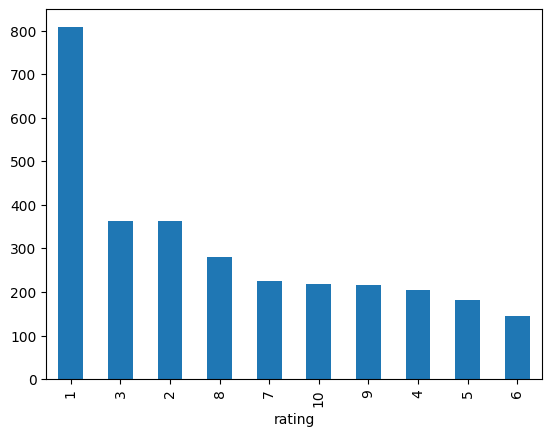

In [51]:
reviews_df.rating.value_counts().plot(kind='bar')

In [52]:
reviews_df['review']=reviews_df['review'].str.split('|',expand=True)[1]
reviews_df.head()

,rating,review
0,1,If you can’t fly First Class don’t fly Britis...
1,1,Singapore to Heathrow. Business class on an...
2,1,I reported my damaged/ruined suitcase 5 wee...
3,1,"On March 1st, I flew from Berlin to São Pau..."
4,1,The WORST customer experience! British Airway...


### Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

### Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

In [53]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Apply the function to clean the text
reviews_df['review'] = reviews_df['review'].apply(clean)

In [54]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [58]:
pose_dictionary = {
    "N": wordnet.NOUN,
    "V": wordnet.VERB,
    "R": wordnet.ADV,
    "J": wordnet.ADJ
}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    new_text = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            new_text.append(tuple([word, pose_dictionary.get(tag[0])]))
    return new_text

reviews_df['pos'] = reviews_df['review'].apply(token_stop_pos)
reviews_df.head()

,rating,review,pos
0,1,If you can t fly First Class don t fly Britis...,"[(fly, v), (First, n), (Class, n), (fly, a), (..."
1,1,Singapore to Heathrow Business class on an A ...,"[(Singapore, n), (Heathrow, n), (Business, n),..."
2,1,I reported my damaged ruined suitcase weeks a...,"[(reported, v), (damaged, n), (ruined, v), (su..."
3,1,On March st I flew from Berlin to S o Paulo w...,"[(March, n), (st, n), (flew, v), (Berlin, n), ..."
4,1,The WORST customer experience British Airways...,"[(WORST, n), (customer, n), (experience, n), (..."


In [59]:
from nltk.stem import WordNetLemmatizer

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

reviews_df['lemmatized'] = reviews_df['pos'].apply(lemmatize)
reviews_df.head()

,rating,review,pos,lemmatized
0,1,If you can t fly First Class don t fly Britis...,"[(fly, v), (First, n), (Class, n), (fly, a), (...",fly First Class fly British Airways uncomfor...
1,1,Singapore to Heathrow Business class on an A ...,"[(Singapore, n), (Heathrow, n), (Business, n),...",Singapore Heathrow Business class Premium Ec...
2,1,I reported my damaged ruined suitcase weeks a...,"[(reported, v), (damaged, n), (ruined, v), (su...",report damaged ruin suitcase week ago still ...
3,1,On March st I flew from Berlin to S o Paulo w...,"[(March, n), (st, n), (flew, v), (Berlin, n), ...",March st fly Berlin Paulo BA encounter sever...
4,1,The WORST customer experience British Airways...,"[(WORST, n), (customer, n), (experience, n), (...",WORST customer experience British Airways BA...


In [60]:
reviews_df.to_csv('reviews.csv', index=False)

In [61]:
def rating_sentiment(rating):
    if int(rating) > 6:
        return 'positive'
    elif int(rating) < 4:
        return 'negative'
    else:
        return 'neutral'

reviews_df['rating_sentiment'] = reviews_df['rating'].apply(rating_sentiment)
reviews_df.head()

,rating,review,pos,lemmatized,rating_sentiment
0,1,If you can t fly First Class don t fly Britis...,"[(fly, v), (First, n), (Class, n), (fly, a), (...",fly First Class fly British Airways uncomfor...,negative
1,1,Singapore to Heathrow Business class on an A ...,"[(Singapore, n), (Heathrow, n), (Business, n),...",Singapore Heathrow Business class Premium Ec...,negative
2,1,I reported my damaged ruined suitcase weeks a...,"[(reported, v), (damaged, n), (ruined, v), (su...",report damaged ruin suitcase week ago still ...,negative
3,1,On March st I flew from Berlin to S o Paulo w...,"[(March, n), (st, n), (flew, v), (Berlin, n), ...",March st fly Berlin Paulo BA encounter sever...,negative
4,1,The WORST customer experience British Airways...,"[(WORST, n), (customer, n), (experience, n), (...",WORST customer experience British Airways BA...,negative


<Axes: title={'center': 'Rating Sentiment Distribution'}>

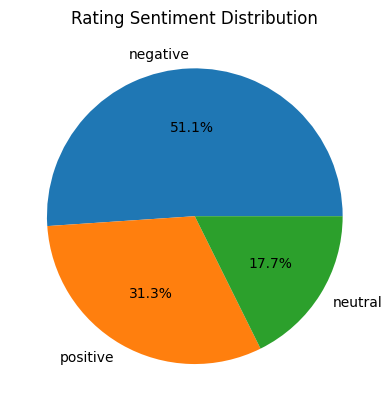

In [77]:
reviews_df.rating_sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='', title='Rating Sentiment Distribution')

In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

reviews_df['review_sentiment'] = reviews_df['lemmatized'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'positive'
    elif compound < 0 :
        return 'negative'
    else:
        return 'neutral'
reviews_df['review_sentiment'] = reviews_df['review_sentiment'].apply(vader_analysis)
reviews_df.head()

,rating,review,pos,lemmatized,rating_sentiment,review_sentiment
0,1,If you can t fly First Class don t fly Britis...,"[(fly, v), (First, n), (Class, n), (fly, a), (...",fly First Class fly British Airways uncomfor...,negative,negative
1,1,Singapore to Heathrow Business class on an A ...,"[(Singapore, n), (Heathrow, n), (Business, n),...",Singapore Heathrow Business class Premium Ec...,negative,neutral
2,1,I reported my damaged ruined suitcase weeks a...,"[(reported, v), (damaged, n), (ruined, v), (su...",report damaged ruin suitcase week ago still ...,negative,negative
3,1,On March st I flew from Berlin to S o Paulo w...,"[(March, n), (st, n), (flew, v), (Berlin, n), ...",March st fly Berlin Paulo BA encounter sever...,negative,negative
4,1,The WORST customer experience British Airways...,"[(WORST, n), (customer, n), (experience, n), (...",WORST customer experience British Airways BA...,negative,negative


<Axes: title={'center': 'Review Sentiment Analysis'}>

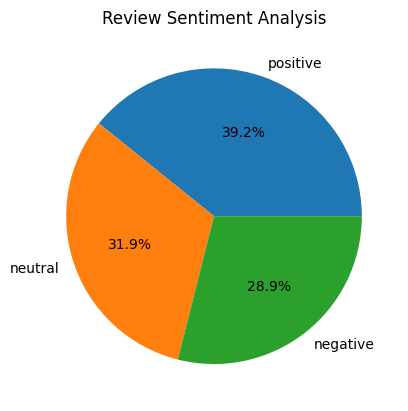

In [76]:
reviews_df.review_sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='', title='Review Sentiment Analysis')

In [79]:
reviews_df.rating_sentiment.value_counts(), reviews_df.review_sentiment.value_counts()

(rating_sentiment
 negative    1532
 positive     938
 neutral      530
 Name: count, dtype: int64,
 review_sentiment
 positive    1176
 neutral      956
 negative     868
 Name: count, dtype: int64)

<Axes: xlabel='rating_sentiment'>

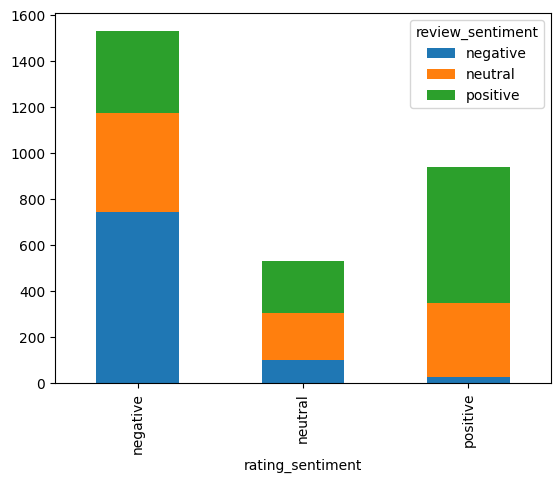

In [65]:
reviews_df.groupby(['rating_sentiment', 'review_sentiment']).size().unstack().plot(kind='bar', stacked=True)

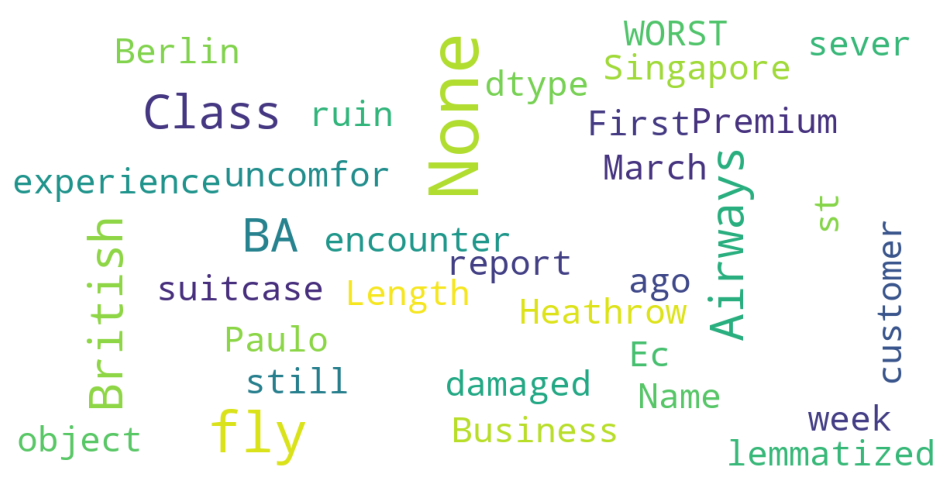

In [71]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=52)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(reviews_df['lemmatized'])